<a href="https://colab.research.google.com/github/fxhassan/MNIST_CNN/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import cv2
from keras import backend as K
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
import numpy as np
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape =[28,28,1]))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax",name = "visualize_me"))


model.compile(loss='categorical_crossentropy',optimizer= SGD(),metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [0]:
batch_size = 32

history = model.fit(x_train,y_train
                    ,batch_size = batch_size
                    ,epochs = 10
                    ,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('loss : ',score[0])
print("accuaracy : ",score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.5841 - acc: 0.8173 - val_loss: 0.1949 - val_acc: 0.9422
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.3000 - acc: 0.9091 - val_loss: 0.1483 - val_acc: 0.9548
Epoch 3/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.2401 - acc: 0.9283 - val_loss: 0.1216 - val_acc: 0.9596
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1993 - acc: 0.9394 - val_loss: 0.1000 - val_acc: 0.9682
Epoch 5/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1661 - acc: 0.9504 - val_loss: 0.0798 - val_acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1419 - acc: 0.9568 - val_loss: 0.0688 - val_acc: 0.9779
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1254 - acc: 0.9628 - val_loss: 0.0610 -

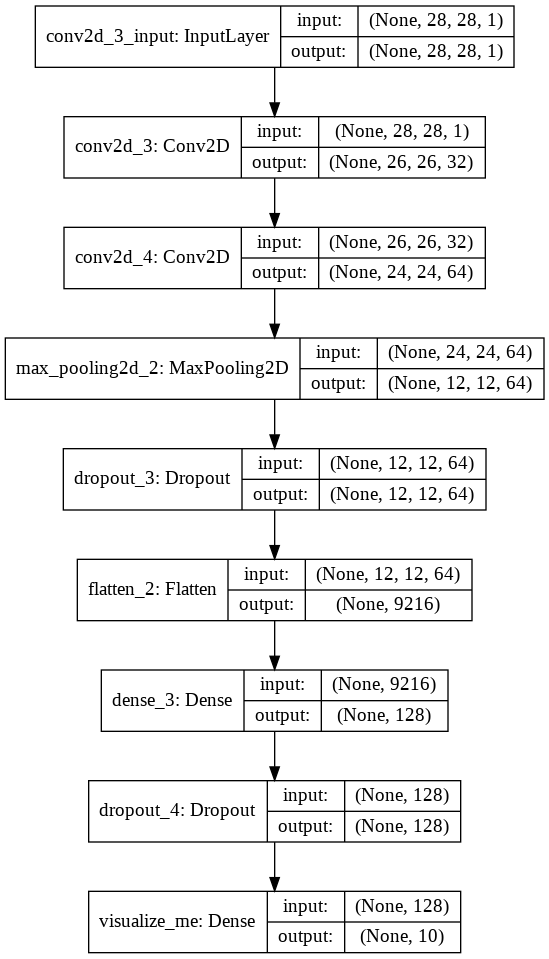

In [0]:
plot_model(model,show_layer_names = True,show_shapes=True,)

In [0]:

for i in range(10):
  cv2_imshow(x_test[i]*255)

In [0]:
def predict_and_show(idx):
  print(model.predict_classes(np.expand_dims(x_test[idx],axis = 0 ))[0])
  cv2_imshow(x_test[idx]*255)


In [0]:
predict_and_show(83)

7


In [0]:
pip uninstall keras-vis

Uninstalling keras-vis-0.5.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras_vis-0.5.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/vis/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/structure.py
Proceed (y/n)? y
  Successfully uninstalled keras-vis-0.5.0


In [0]:
pip install https://github.com/raghakot/keras-vis/archive/master.zip

  Using cached https://github.com/raghakot/keras-vis/archive/master.zip
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=30855 sha256=65cf361afb517bb87fea0e4136d671ac8257b9524296b17e434275aefb29a1c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-mq3pzdq4/wheels/7e/91/e5/9fdb0f2f5fa5d9f402c6fbfaf015aadbe3dba024ede6532727
Successfully built keras-vis


In [0]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
import matplotlib.pyplot as plt

In [0]:
layer_index = utils.find_layer_idx(model, 'visualize_me')
model.layers[layer_index].activation = activations.linear
model = utils.apply_modifications(model)  

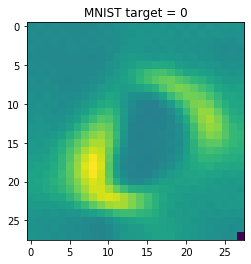

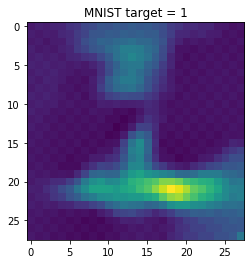

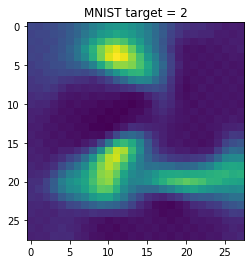

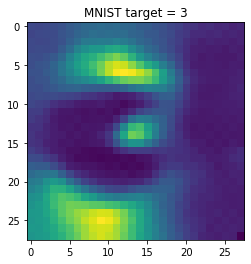

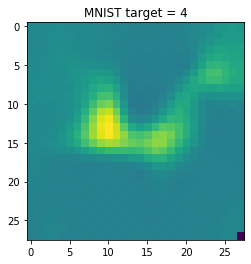

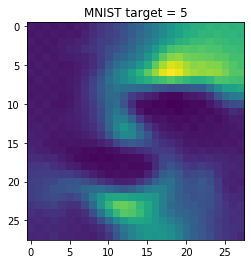

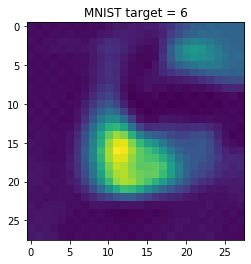

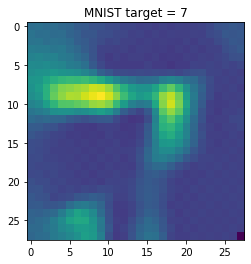

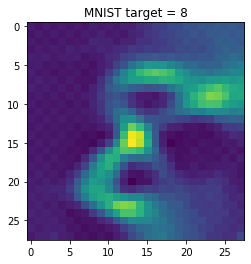

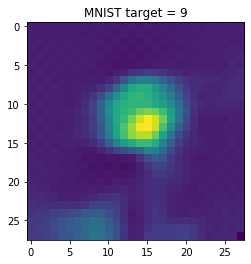

In [0]:
numbers_to_visualize = [x for x in range(0,10)]

for number_to_visualize in numbers_to_visualize:
  visualization = visualize_activation(model, layer_index, filter_indices=number_to_visualize, input_range=(0., 1.))
  plt.imshow(visualization[..., 0])
  plt.title(f'MNIST target = {number_to_visualize}')
  plt.show()

